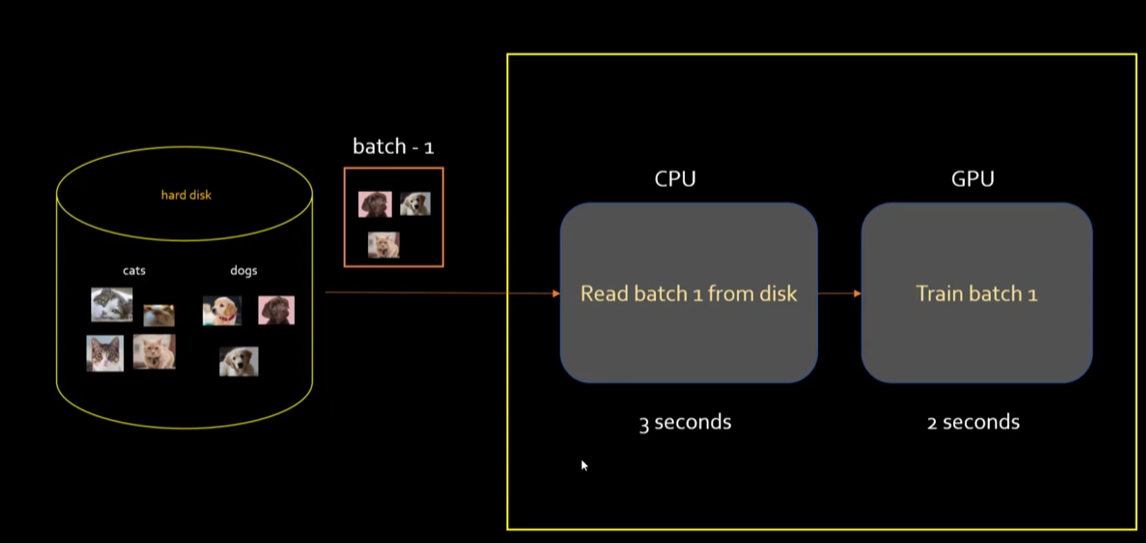

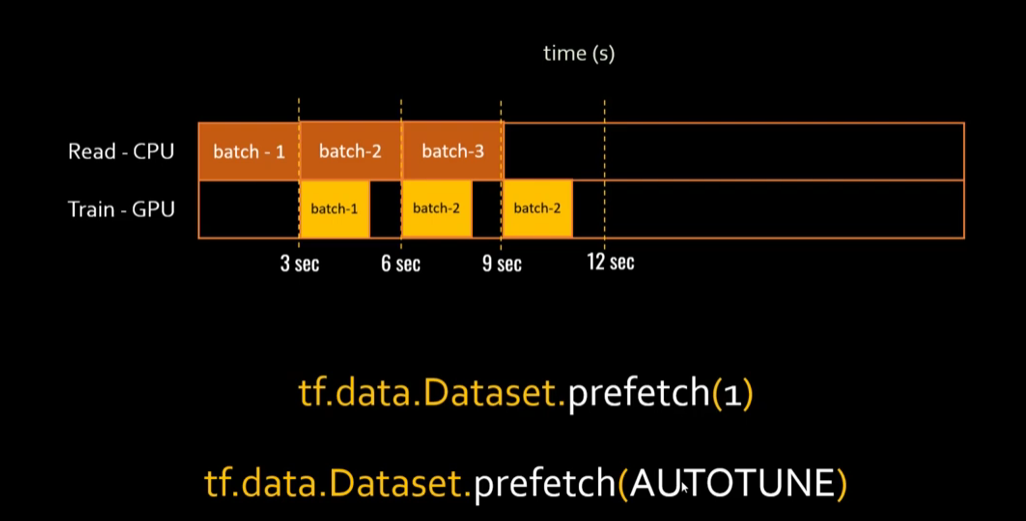

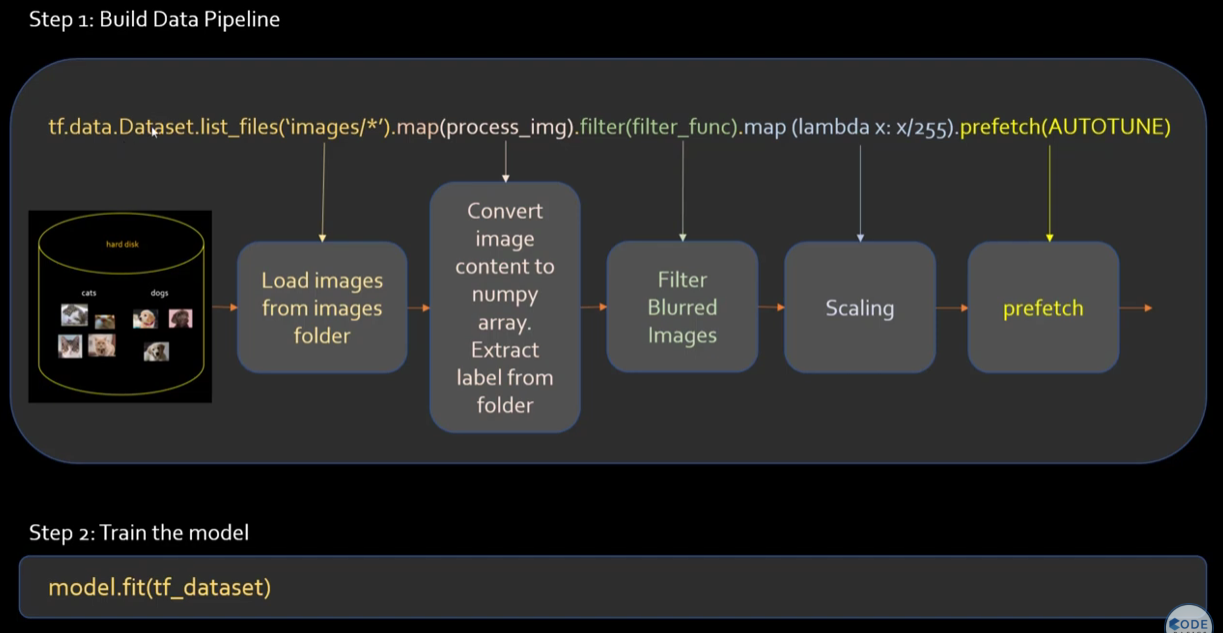

without cache

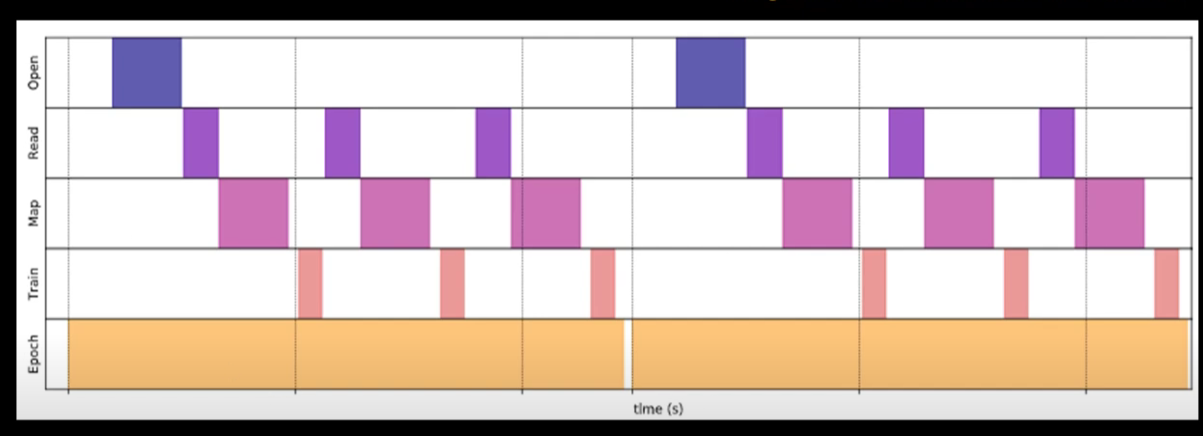

with cache

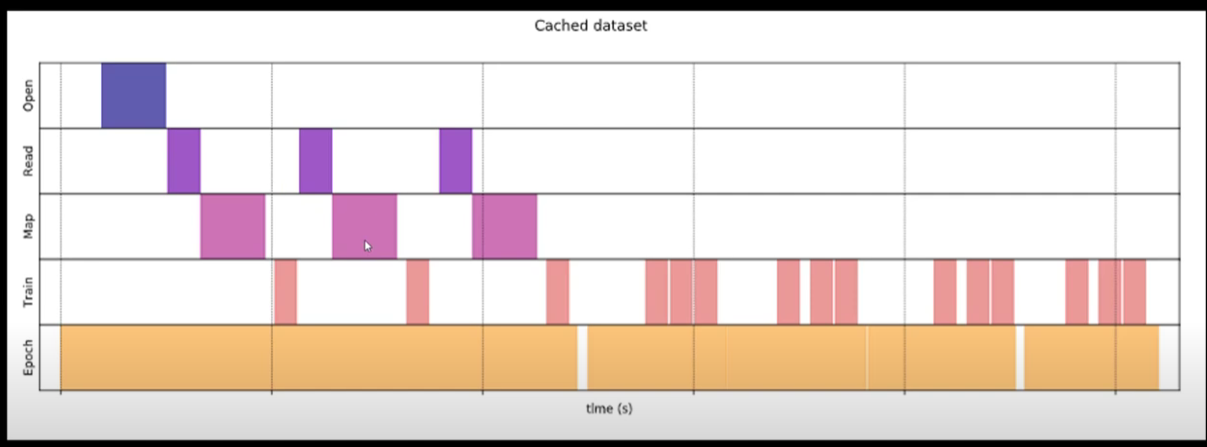

In [11]:
import tensorflow as tf
import time

# Prefetch

In [12]:
class FileDataset(tf.data.Dataset):
    def read_file_in_batches(num_samples):
        # Opening the file
        time.sleep(0.03)

        for sample_idx in range(num_samples):
            # Reading data (line, record) from the file
            time.sleep(0.015)

            yield (sample_idx,)

    def __new__(cls, num_samples=3):
        return tf.data.Dataset.from_generator(
            cls.read_file_in_batches,
            output_signature = tf.TensorSpec(shape = (1,), dtype = tf.int64),
            args=(num_samples,)
        )

In [13]:
def benchmark(dataset, num_epochs=2):
    for epoch_num in range(num_epochs):
        for sample in dataset:
            # Performing a training step
            time.sleep(0.01)

In [14]:
%%timeit
benchmark(FileDataset())

362 ms ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
benchmark(FileDataset().prefetch(1))

310 ms ± 8.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
benchmark(FileDataset().prefetch(tf.data.AUTOTUNE))

304 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Cache

In [17]:
dataset = tf.data.Dataset.range(5)
dataset = dataset.map(lambda x: x**2)
dataset = dataset.cache("mycache.txt")
# The first time reading through the data will generate the data using
# `range` and `map`.
for d in dataset:
    print(d.numpy())

0
1
4
9
16


In [18]:
# Subsequent iterations read from the cache.
list(dataset.as_numpy_iterator())


[0, 1, 4, 9, 16]

In [19]:
def mapped_function(s):
    # Do some hard pre-processing
    tf.py_function(lambda: time.sleep(0.03), [], ())
    return s

In [21]:
%%timeit
benchmark(FileDataset().map(mapped_function),5)

1.4 s ± 34.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%%timeit
benchmark(FileDataset().map(mapped_function).cache(),5)

492 ms ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
